<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

In [32]:
# multiple lines

<img src="multiple_lines.JPEG" style="width:570px;height:450px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [3]:
df1 = pd.DataFrame({'area':(2600,3000,3200,3600,4000),'price':(550000,565000,610000,680000,725000)})

In [4]:
df1

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


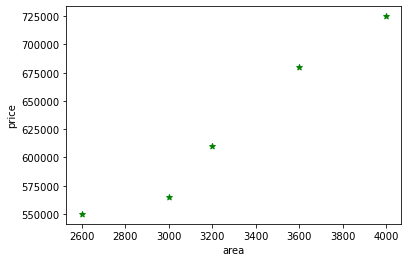

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='green',marker='*')


In [7]:
X = df[['area']]  
X

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [8]:
y = df.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [9]:
# import our module
from sklearn.linear_model import LinearRegression

In [10]:
# Create linear regression object
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

#### **(1) Predict price of a home with area = 3300 sqr ft**

In [41]:
reg.predict([[3300]])

array([628715.75342466])

In [42]:
reg.coef_

array([135.78767123])

In [43]:
reg.intercept_

180616.43835616432

**Y = m * X + b (m is coefficient and b is intercept)**

In [44]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

**(1) Predict price of a home with area = 5000 sqr ft**

In [45]:
reg.predict([[5000]])

array([859554.79452055])

<h3 style="color:purple">Generate CSV file with list of home price predictions</h3>

In [12]:
area_df = pd.read_csv("areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [47]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [48]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [49]:
area_df['prices'][0]

316404.1095890411

In [50]:
#convert dataframe to csv
area_df.to_csv("prediction.csv",index=False)

In [51]:
output=pd.read_csv('prediction.csv')

In [52]:
output

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


### Metrics for model evaluation 

#### R-Squared value

This value ranges from 0 to 1. Value ‘1’ indicates predictor perfectly accounts for all the variation in Y. Value ‘0’ indicates that predictor ‘x’ accounts for no variation in ‘y’.

In [53]:
y

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [13]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [14]:
y_predicted=reg.predict(X)

In [15]:
y_predicted

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y,y_predicted)

0.9584301138199486

In [57]:
from IPython.display import Image

#### how to calculate R-Squared value 

1. Regression sum of squares (SSR):->
This gives information about how far estimated regression line is from the horizontal ‘no relationship’ line (average of actual output).

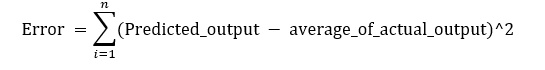

In [58]:
Image(r'C:\Users\Ravindra\Desktop\for  lecuture\SSR.png')  #provie full path to open image

2. Sum of Squared error (SSE):->
How much the target value varies around the regression line (predicted value).
we named it as cost function

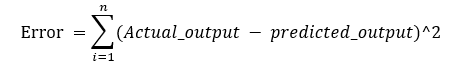

In [59]:
Image(r'C:\Users\Ravindra\Desktop\for  lecuture\SSE.png')  #provie full path to open image

3. Total sum of squares (SSTO):->
This tells how much the data point move around the mean.

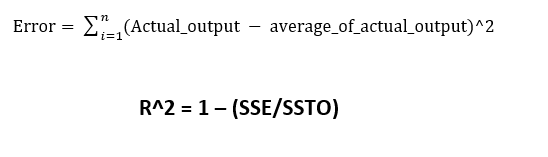

In [60]:
Image(r'C:\Users\Ravindra\Desktop\for  lecuture\SSTO.png')  #provie full path to open image

#### Is the range of R-Square always between 0 to 1? 

Value of R2 may end up being negative if the regression line is made to pass through a point forcefully. This will lead to forcefully making regression line to pass through the origin (no intercept) giving an error higher than the error produced by the horizontal line. This will happen if the data is far away from the origin.

#### Mean Squared Error 

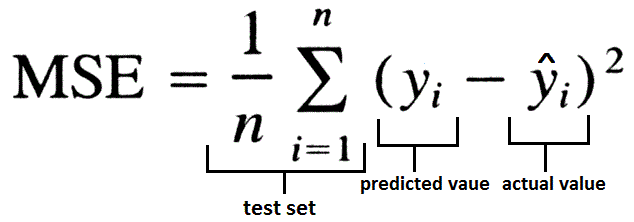

In [61]:
Image(r'C:\Users\Ravindra\Desktop\MSE.png')  #provie full path to open image

In [62]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y,y_pred=y_predicted)

186815068.4931509

#### What does the Mean Squared Error Tell You?
The smaller the mean squared error, the closer you are to finding the line of best fit. Depending on your data, it may be impossible to get a very small value for the mean squared error. For example, the above data is scattered wildly around the regression line, so 186815068 is as good as it gets (and is in fact, the line of best fit).